# Practicing with Pixar movies data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pixar_movies = pd.read_csv('PixarMovies.csv')
print(pixar_movies.dtypes)

Year Released                int64
Movie                       object
Length                       int64
RT Score                     int64
IMDB Score                 float64
Metacritic Score             int64
Opening Weekend            float64
Worldwide Gross            float64
Domestic Gross             float64
Adjusted Domestic Gross    float64
International Gross        float64
Domestic %                  object
International %             object
Production Budget            int64
Oscars Nominated           float64
Oscars Won                 float64
dtype: object


In [3]:
print(pixar_movies.describe())

       Year Released      Length    RT Score  IMDB Score  Metacritic Score  \
count      15.000000   15.000000   15.000000   15.000000         15.000000   
mean     2006.066667  101.533333   89.333333    7.846667         82.800000   
std         5.933761    9.927355   16.451950    0.655599         12.119642   
min      1995.000000   81.000000   39.000000    6.300000         57.000000   
25%      2002.000000   96.000000   85.000000    7.300000         75.000000   
50%      2007.000000  102.000000   96.000000    8.000000         88.000000   
75%      2010.500000  109.000000   98.500000    8.300000         92.000000   
max      2015.000000  116.000000  100.000000    8.800000         96.000000   

       Opening Weekend  Worldwide Gross  Domestic Gross  \
count        15.000000        15.000000       15.000000   
mean         67.990667       612.486667      258.506667   
std          23.270468       190.193934       66.518284   
min          29.140000       362.000000      162.800000   
25

## Cleaning the data

In [4]:
# because of the '%' included in certain columns, pandas recognized the column dtype as object
# we want to convert it into a float representation
# remove '%' and convert to float
pixar_movies['Domestic %'] = pixar_movies['Domestic %'].str.rstrip('%').astype(float)
pixar_movies['International %'] = pixar_movies['International %'].str.rstrip('%').astype(float)

In [5]:
# convert IMDB score scale from 0 to 100 (previously 0 to 10)
pixar_movies['IMDB Score'] = pixar_movies['IMDB Score']*10

# drop the inside out row b/c there are missing values
filtered_pixar = pixar_movies.dropna()
print(filtered_pixar.dtypes)

Year Released                int64
Movie                       object
Length                       int64
RT Score                     int64
IMDB Score                 float64
Metacritic Score             int64
Opening Weekend            float64
Worldwide Gross            float64
Domestic Gross             float64
Adjusted Domestic Gross    float64
International Gross        float64
Domestic %                 float64
International %            float64
Production Budget            int64
Oscars Nominated           float64
Oscars Won                 float64
dtype: object


In [6]:
# set the movie name as the index
#  if inplace=True, cannot 'double store' into same DF b/c it locally changes the data
filtered_pixar.set_index('Movie', inplace=True)
print(filtered_pixar.head(2))

              Year Released  Length  RT Score  IMDB Score  Metacritic Score  \
Movie                                                                         
Toy Story              1995      81       100        83.0                92   
A Bug's Life           1998      96        92        72.0                77   

              Opening Weekend  Worldwide Gross  Domestic Gross  \
Movie                                                            
Toy Story               29.14            362.0           191.8   
A Bug's Life            33.26            363.4           162.8   

              Adjusted Domestic Gross  International Gross  Domestic %  \
Movie                                                                    
Toy Story                      356.21                170.2       52.98   
A Bug's Life                   277.18                200.6       44.80   

              International %  Production Budget  Oscars Nominated  Oscars Won  
Movie                                   

## Data visualization

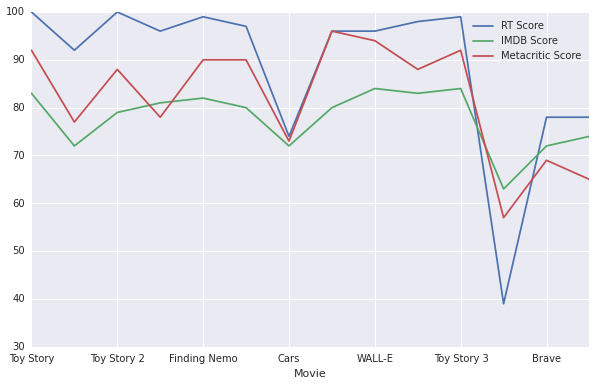

In [7]:
critics_reviews = filtered_pixar[['RT Score','IMDB Score','Metacritic Score']]
critics_reviews.plot(figsize=(10,6))
sns.plt.show()

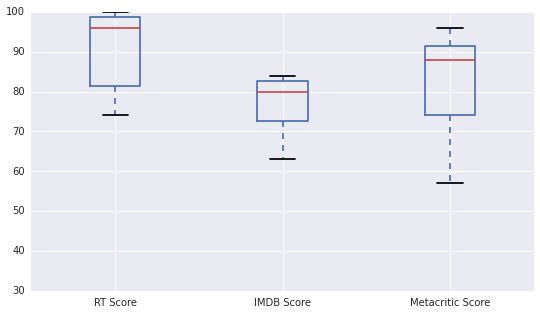

In [8]:
critics_reviews.plot(kind='box', figsize=(9,5))
sns.plt.show()

### Stacked bar plot

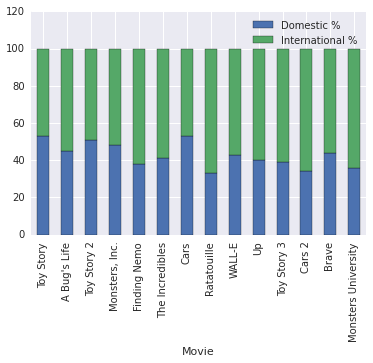

In [9]:
columns=['Domestic %','International %']
revenue_proportions = filtered_pixar[columns]
revenue_proportions.plot(kind='bar',stacked=True)
sns.plt.show()

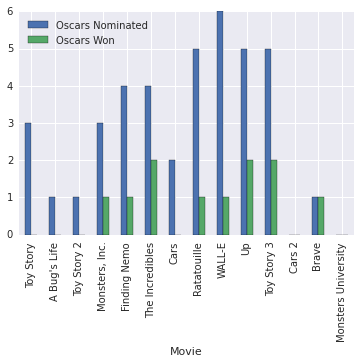

In [10]:
columns = ['Oscars Nominated','Oscars Won']
filtered_pixar[columns].plot(kind='bar')
sns.plt.show()